In [106]:

import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt 

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# ==========================
# 1. STATIC IMAGES
# ==========================

# Add paths to images here if you want to test on still images
# IMAGE_FILES = []
# BG_COLOR = (192, 192, 192)  # gray background for segmentation

# with mp_holistic.Holistic(
#         static_image_mode=True,
#         model_complexity=2,
#         enable_segmentation=True,
#         refine_face_landmarks=True) as holistic:

#     for idx, file in enumerate(IMAGE_FILES):
#         image = cv2.imread(file)
#         if image is None:
#             print(f"Could not read image: {file}")
#             continue

#         image_height, image_width, _ = image.shape

#         # Convert BGR image (OpenCV) to RGB (MediaPipe)
#         results = holistic.process(
#             cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         )

#         # Example: print nose coordinates if pose is detected
#         if results.pose_landmarks:
#             print(
#                 "Nose coordinates: ("
#                 f"{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, "
#                 f"{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})"
#             )

#         annotated_image = image.copy()

#         # Draw segmentation (foreground vs background)
#         if results.segmentation_mask is not None:
#             condition = np.stack(
#                 (results.segmentation_mask,) * 3, axis=-1
#             ) > 0.1
#             bg_image = np.zeros(image.shape, dtype=np.uint8)
#             bg_image[:] = BG_COLOR
#             annotated_image = np.where(condition, annotated_image, bg_image)

#         # Face landmarks
#         if results.face_landmarks:
#             mp_drawing.draw_landmarks(
#                 annotated_image,
#                 results.face_landmarks,
#                 mp_holistic.FACEMESH_TESSELATION,
#                 landmark_drawing_spec=None,
#                 connection_drawing_spec=mp_drawing_styles
#                     .get_default_face_mesh_tesselation_style(),
#             )

#         # Pose landmarks
#         if results.pose_landmarks:
#             mp_drawing.draw_landmarks(
#                 annotated_image,
#                 results.pose_landmarks,
#                 mp_holistic.POSE_CONNECTIONS,
#                 landmark_drawing_spec=mp_drawing_styles
#                     .get_default_pose_landmarks_style(),
#             )

#         # Optional: hand landmarks (if you want them here too)
#         if results.left_hand_landmarks:
#             mp_drawing.draw_landmarks(
#                 annotated_image,
#                 results.left_hand_landmarks,
#                 mp_holistic.HAND_CONNECTIONS,
#                 mp_drawing_styles.get_default_hand_landmarks_style(),
#                 mp_drawing_styles.get_default_hand_connections_style(),
#             )
#         if results.right_hand_landmarks:
#             mp_drawing.draw_landmarks(
#                 annotated_image,
#                 results.right_hand_landmarks,
#                 mp_holistic.HAND_CONNECTIONS,
#                 mp_drawing_styles.get_default_hand_landmarks_style(),
#                 mp_drawing_styles.get_default_hand_connections_style(),
#             )

#         out_path = f"/tmp/annotated_image_{idx}.png"
#         cv2.imwrite(out_path, annotated_image)
#         print("Saved:", out_path)


# ==========================
# 2. WEBCAM INPUT (NO FLIP)
# ==========================

# Change this if your camera is not index 0 (e.g. 1, 2, 5, …)
CAMERA_INDEX = 0

cap = cv2.VideoCapture(CAMERA_INDEX)

with mp_holistic.Holistic(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            # If loading from a video file, use 'break' instead of 'continue'.
            continue

        # For performance: mark the image as not writeable to pass by reference
        image.flags.writeable = False
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image_rgb)
        print(results)  
        break

        # # Now allow drawing on the image again
        # image.flags.writeable = True
        # image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)


        # # Face contours
        # if results.face_landmarks:
        #     mp_drawing.draw_landmarks(
        #         image,
        #         results.face_landmarks,
        #         mp_holistic.FACEMESH_CONTOURS,
        #         landmark_drawing_spec=None,
        #         connection_drawing_spec=mp_drawing_styles
        #             .get_default_face_mesh_contours_style(),
        #     )

        # # Pose landmarks
        # if results.pose_landmarks:
        #     mp_drawing.draw_landmarks(
        #         image,
        #         results.pose_landmarks,
        #         mp_holistic.POSE_CONNECTIONS,
        #         landmark_drawing_spec=mp_drawing_styles
        #             .get_default_pose_landmarks_style(),
        #     )

        # # Left hand
        # if results.left_hand_landmarks:
        #     mp_drawing.draw_landmarks(
        #         image,
        #         results.left_hand_landmarks,
        #         mp_holistic.HAND_CONNECTIONS,
        #         mp_drawing_styles.get_default_hand_landmarks_style(),
        #         mp_drawing_styles.get_default_hand_connections_style(),
        #     )

        # # Right hand
        # if results.right_hand_landmarks:
        #     mp_drawing.draw_landmarks(
        #         image,
        #         results.right_hand_landmarks,
        #         mp_holistic.HAND_CONNECTIONS,
        #         mp_drawing_styles.get_default_hand_landmarks_style(),
        #         mp_drawing_styles.get_default_hand_connections_style(),
        #     )

        # # IMPORTANT: no flip here → camera view is not mirrored
        # cv2.imshow("MediaPipe Holistic", cv2.flip(image, 1))


        # # Press ESC to quit
        # if cv2.waitKey(5) & 0xFF == 27:
        #     break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1765401887.826223   11003 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1765401887.968198   11255 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 570.195.03), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2
W0000 00:00:1765401888.021849   11241 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765401888.035410   11254 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765401888.036150   11253 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1765401888.036157   11240 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00

<class 'mediapipe.python.solution_base.SolutionOutputs'>


/home/lananh/anaconda3/envs/mp_env/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Converting Mediapipe to Dataframe

In [107]:

import matplotlib.pyplot as plt

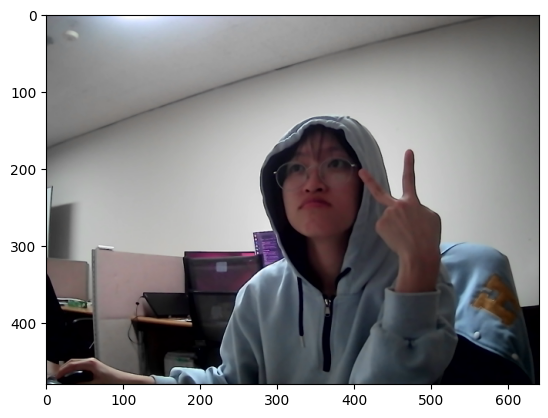

In [108]:
plt.imshow(image_rgb)

In [109]:
import pandas as pd
print(pd.__version__)

2.3.3


In [110]:
# results.face_landmarks'
#type(results.face_landmarks)
#results.face_landmarks.landmark
results.face_landmarks.landmark[0]


x: 0.541072249
y: 0.498520523
z: -0.0301306341

In [111]:
# face = pd.DataFrame()
# for i, point in enumerate(results.face_landmarks.landmark):
#     # break
#     # point.x, point.y, point.z
    
#     # landmarks.loc[i, 'x'] = point.x
#     # landmarks.loc[i, 'y'] = point.y
#     # landmarks.loc[i, 'z'] = point.z
#    face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
# pose = pd.DataFrame()

In [ ]:
import pandas as pd

def extract_landmarks(results):
    # Initialize 4 empty DataFrames: face / pose / left / right
    face = pd.DataFrame(columns=['x', 'y', 'z'])
    pose = pd.DataFrame(columns=['x', 'y', 'z'])
    left_hand = pd.DataFrame(columns=['x', 'y', 'z'])
    right_hand = pd.DataFrame(columns=['x', 'y', 'z'])

    # ---- Face landmarks ----
    if results.face_landmarks is not None:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- Pose landmarks ----
    if results.pose_landmarks is not None:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- Left hand landmarks ----
    if results.left_hand_landmarks is not None:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # ---- Right hand landmarks ----
    if results.right_hand_landmarks is not None:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    # Return all 4 DataFrames
    return face, pose, left_hand, right_hand
face, pose, left_hand, right_hand = extract_landmarks(results)

In [113]:
face.assign

<bound method DataFrame.assign of             x         y         z
0    0.541072  0.498521 -0.030131
1    0.538438   0.46807 -0.038638
2    0.541719  0.481513 -0.024491
3    0.534506  0.436113 -0.020656
4    0.538003  0.456654  -0.03909
..        ...       ...       ...
463  0.568938  0.413751  0.013834
464  0.563351  0.415988   0.00982
465  0.559418  0.416909  0.004912
466  0.606216  0.404648  0.013122
467   0.61052  0.398575  0.013114

[468 rows x 3 columns]>

Create the Kaggle Type Format from detected landmarks

<Axes: xlabel='x', ylabel='y'>

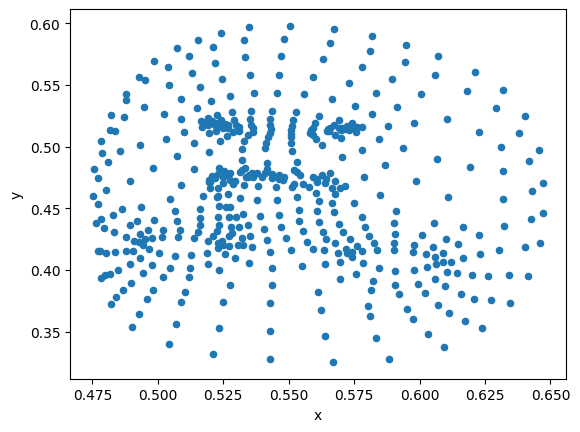

In [114]:
face.plot(x='x', y='y', kind='scatter')

In [115]:
lanmarks=pd.DataFrame

In [116]:
face.shape

(468, 3)

In [117]:
face.reset_index().rename(columns={'index':'landmark_index'}).assign(type='face')

,landmark_index,x,y,z,type
0,0,0.541072,0.498521,-0.030131,face
1,1,0.538438,0.46807,-0.038638,face
2,2,0.541719,0.481513,-0.024491,face
3,3,0.534506,0.436113,-0.020656,face
4,4,0.538003,0.456654,-0.03909,face
...,...,...,...,...,...
463,463,0.568938,0.413751,0.013834,face
464,464,0.563351,0.415988,0.00982,face
465,465,0.559418,0.416909,0.004912,face
466,466,0.606216,0.404648,0.013122,face


In [118]:
pose.reset_index().rename(columns={'index':'landmark_index'}).assign(type='pose')

,landmark_index,x,y,z,type
0,0,0.549123,0.464602,-0.498889,pose
1,1,0.567454,0.429303,-0.465173,pose
2,2,0.580682,0.431521,-0.464697,pose
3,3,0.591506,0.434549,-0.464017,pose
4,4,0.528646,0.428877,-0.451948,pose
5,5,0.516117,0.430983,-0.451081,pose
6,6,0.504324,0.433681,-0.451218,pose
7,7,0.613387,0.464235,-0.240439,pose
8,8,0.494778,0.473752,-0.188178,pose
9,9,0.58099,0.517924,-0.420316,pose


In [119]:

face = face.reset_index().rename(columns={'index':'landmark_index'}).assign(type='face'),
pose = pose.reset_index().rename(columns={'index':'landmark_index'}).assign(type='pose'),
left_hand = left_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='left_hand'),
right_hand = right_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='right_hand')


In [120]:
right_hand

,landmark_index,x,y,z,type


In [121]:
face, pose, left_hand, right_hand = extract_landmarks(results)
print(type(left_hand))
print(type(pose))
print(type(face))
print(type(right_hand))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [122]:
right_hand.shape

(0, 3)

In [123]:
pd.concat([face, pose, left_hand, right_hand], ignore_index=True)

,x,y,z
0,0.541072,0.498521,-0.030131
1,0.538438,0.46807,-0.038638
2,0.541719,0.481513,-0.024491
3,0.534506,0.436113,-0.020656
4,0.538003,0.456654,-0.03909
...,...,...,...
517,0.719054,0.568673,-0.009157
518,0.680156,0.566548,0.000195
519,0.683569,0.567193,0.000524
520,0.698625,0.581404,0.003666


In [124]:
import numpy as np

def add_type_and_index(df, name):
    df = df.copy()
    df['type'] = name
    df['landmark_index'] = np.arange(len(df))
    return df

face      = add_type_and_index(face,      'face')
pose      = add_type_and_index(pose,      'pose')
left_hand = add_type_and_index(left_hand, 'left_hand')
right_hand= add_type_and_index(right_hand,'right_hand')

landmarks = pd.concat(
    [face, pose, left_hand, right_hand],
    ignore_index=True
)


In [125]:
columns = ['landmark_index', 'x', 'y', 'z', 'type']
landmarks = landmarks[columns]

landmarks


,landmark_index,x,y,z,type
0,0,0.541072,0.498521,-0.030131,face
1,1,0.538438,0.46807,-0.038638,face
2,2,0.541719,0.481513,-0.024491,face
3,3,0.534506,0.436113,-0.020656,face
4,4,0.538003,0.456654,-0.03909,face
...,...,...,...,...,...
517,16,0.719054,0.568673,-0.009157,left_hand
518,17,0.680156,0.566548,0.000195,left_hand
519,18,0.683569,0.567193,0.000524,left_hand
520,19,0.698625,0.581404,0.003666,left_hand


In [ ]:
def create_frame_landmarks_df(results, frame):
    xyz_skel = xyz.query(f'frame == {frame}')[['type','landmark_index']].copy()
    face = pd.DataFrame(columns=['x', 'y', 'z'])
    pose = pd.DataFrame(columns=['x', 'y', 'z'])
    left_hand = pd.DataFrame(columns=['x', 'y', 'z'])
    right_hand = pd.DataFrame(columns=['x', 'y', 'z'])

    if results.face_landmarks is not None:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    if results.pose_landmarks is not None:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    if results.left_hand_landmarks is not None:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

    if results.right_hand_landmarks is not None:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]\
    
    landmarks = pd.concat(
        [add_type_and_index(face, 'face'),
         add_type_and_index(pose, 'pose'),
         add_type_and_index(left_hand, 'left_hand'),
         add_type_and_index(right_hand, 'right_hand')],
        ignore_index=True)
    landmarks = xyz_skel.merge(landmarks, on=['type','landmark_index'], how='left')
    landmarks = landmarks.assign(frame=frame)
    return landmarks

In [ ]:
create_frame_landmarks_df(results, 105)

,type,landmark_index,x,y,z
0,face,0,0.689,0.25691,-0.022579
1,face,1,0.687184,0.233947,-0.027592
2,face,2,0.687776,0.244294,-0.017643
3,face,3,0.681045,0.213294,-0.015466
4,face,4,0.686602,0.226166,-0.027807
...,...,...,...,...,...
538,right_hand,16,0.436779,0.168966,-0.032974
539,right_hand,17,0.4241,0.256539,-0.018049
540,right_hand,18,0.412437,0.23138,-0.027212
541,right_hand,19,0.405699,0.214587,-0.030844


In [ ]:
train['sign'].value_counts()

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64

Kaggle competition Data

In [ ]:
import pandas as pd
import pyarrow  # test import

base_dir = '/home/lananh/GISLR'
train = pd.read_csv(base_dir + '/train.csv')
pq_file = base_dir + '/train_landmark_files/16069/695046.parquet'
xyz = pd.read_parquet(pq_file)

In [ ]:
xyz


,frame,row_id,type,landmark_index,x,y,z
0,105,105-face-0,face,0,0.459484,0.450040,-0.048297
1,105,105-face-1,face,1,0.451732,0.401943,-0.066326
2,105,105-face-2,face,2,0.452219,0.418714,-0.042678
3,105,105-face-3,face,3,0.438481,0.372725,-0.040756
4,105,105-face-4,face,4,0.450793,0.390858,-0.067166
...,...,...,...,...,...,...,...
21715,144,144-right_hand-16,right_hand,16,NaN,NaN,NaN
21716,144,144-right_hand-17,right_hand,17,NaN,NaN,NaN
21717,144,144-right_hand-18,right_hand,18,NaN,NaN,NaN
21718,144,144-right_hand-19,right_hand,19,NaN,NaN,NaN


In [ ]:
xyz['x']


0        0.459484
1        0.451732
2        0.452219
3        0.438481
4        0.450793
           ...   
21715         NaN
21716         NaN
21717         NaN
21718         NaN
21719         NaN
Name: x, Length: 21720, dtype: float64

In [ ]:
xyz.query('frame == 0')

,frame,row_id,type,landmark_index,x,y,z


In [ ]:
xyz.head()

,frame,row_id,type,landmark_index,x,y,z
0,105,105-face-0,face,0,0.459484,0.450040,-0.048297
1,105,105-face-1,face,1,0.451732,0.401943,-0.066326
2,105,105-face-2,face,2,0.452219,0.418714,-0.042678
3,105,105-face-3,face,3,0.438481,0.372725,-0.040756
4,105,105-face-4,face,4,0.450793,0.390858,-0.067166


In [ ]:
xyz.query('frame == 105')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [ ]:
train.query('sequence_id == 695046')

,path,participant_id,sequence_id,sign
87142,train_landmark_files/16069/695046.parquet,16069,695046,mad


In [ ]:
xyz.shape

(21720, 7)

In [ ]:
xyz['frame'].value_counts()

frame
105    543
106    543
127    543
128    543
129    543
130    543
131    543
132    543
133    543
134    543
135    543
136    543
137    543
138    543
139    543
140    543
141    543
142    543
143    543
126    543
125    543
124    543
114    543
107    543
108    543
109    543
110    543
111    543
112    543
113    543
115    543
123    543
116    543
117    543
118    543
119    543
120    543
121    543
122    543
144    543
Name: count, dtype: int64

In [ ]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [ ]:
load_relevant_data_subset(pq_file)

array([[[ 0.45948398,  0.4500395 , -0.04829748],
        [ 0.45173237,  0.40194264, -0.06632552],
        [ 0.45221898,  0.41871366, -0.04267786],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.46082965,  0.45016515, -0.04897476],
        [ 0.4530412 ,  0.40040755, -0.06559902],
        [ 0.4539941 ,  0.4187384 , -0.04233811],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.4618592 ,  0.45019463, -0.04898312],
        [ 0.4520577 ,  0.4005303 , -0.06530729],
        [ 0.4533796 ,  0.41913965, -0.04217359],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       ...,

       [[ 0.4542724 ,  0.45030934, -0.04624626],
        [ 0

In [ ]:
xyz_np = load_relevant_data_subset(pq_file)

In [ ]:
xyz_np.shape

(40, 543, 3)

In [ ]:
xyz_np[0].shape

(543, 3)

In [ ]:
pd.DataFrame(xyz_np[0])

,0,1,2
0,0.459484,0.450040,-0.048297
1,0.451732,0.401943,-0.066326
2,0.452219,0.418714,-0.042678
3,0.438481,0.372725,-0.040756
4,0.450793,0.390858,-0.067166
...,...,...,...
538,NaN,NaN,NaN
539,NaN,NaN,NaN
540,NaN,NaN,NaN
541,NaN,NaN,NaN
